In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [2]:
img = load_img('dogs-vs-cats/train/cat/cat.0.jpg')
x = img_to_array(img)
x = x.reshape((1,)+x.shape)



In [4]:
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='dogs-vs-cats/preview',
                          save_prefix='cat', save_format='jpeg'):
    i+=1
    if i > 24:
        break

전체 코드

In [24]:
import os
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau 
from tensorflow.keras.preprocessing import image

rootPath = 'dogs-vs-cats/'
# ImageDataGenerator 클래스는 이미지 데이터 증강을 위해 다양한 변환을 적용할 수 있는 도구입니다.
imageGenerator = ImageDataGenerator (
    # rescale: 이미지 픽셀 값을 0과 1 사이로 스케일링.
    rescale=1./255,
    # rotation_range: 이미지를 임의로 회전할 각도의 범위• 여기서는 최대 40도까지 회전.
    rotation_range=40,
    # width__shift_range: 이미지를 수평으로 임의로 이동할 범위. 여기서는 전체 가로 길이의 20%까지 이동.
    width_shift_range=0.2,
    #height_shift_range: 이미지를 수직으로 임의로 이동할 범위. 여기서는 전체 세로 길이의 20%까지 이동.
    height_shift_range=0.2,
    # Shear_range: 이미지에 전단 변환을 적용할 범위. 여기서는 최대 20%까지 전단 # 전단 변환은 이미지의 한 부분을 고정시키고 다른 부분을 평행 이동시키는 변환.
    shear_range=0.2,
    # 20om_range: 이미지를 임의로 확대하거나 축소할 범위. 여기서는 최대 20%까지 확대 또는 축소.
    zoom_range=0.2,
    # brightness_range: 이미지의 밝기를 임의로 변경할 범위. 여기서는 밝기를 0.2에서 1.0 사이로 변경.
    brightness_range=[0.2, 1.0],
    # horizontal_flip: 이미지를 수평으로 뒤집을지 여부를 결정. True로 설정하면 이미지를 수평으로.
    horizontal_flip=True,
    # validation_split: 전체 데이터 중 검증 데이터로 사용할 비율을 설정. 여기서는 23를 검증 데이터로 사용.
    validation_split=0.2,
    # filL mode: 이미지 변환 시 생기는 빈 공간을 채우는 방법을 설정. 'nearest'는 가장 가까운 픽셀 값으로 채우는 방법.
    fill_mode= 'nearest'
)

In [25]:
set_batch_size = 256

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    batch_size=set_batch_size,
    class_mode='binary',
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    batch_size=set_batch_size,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


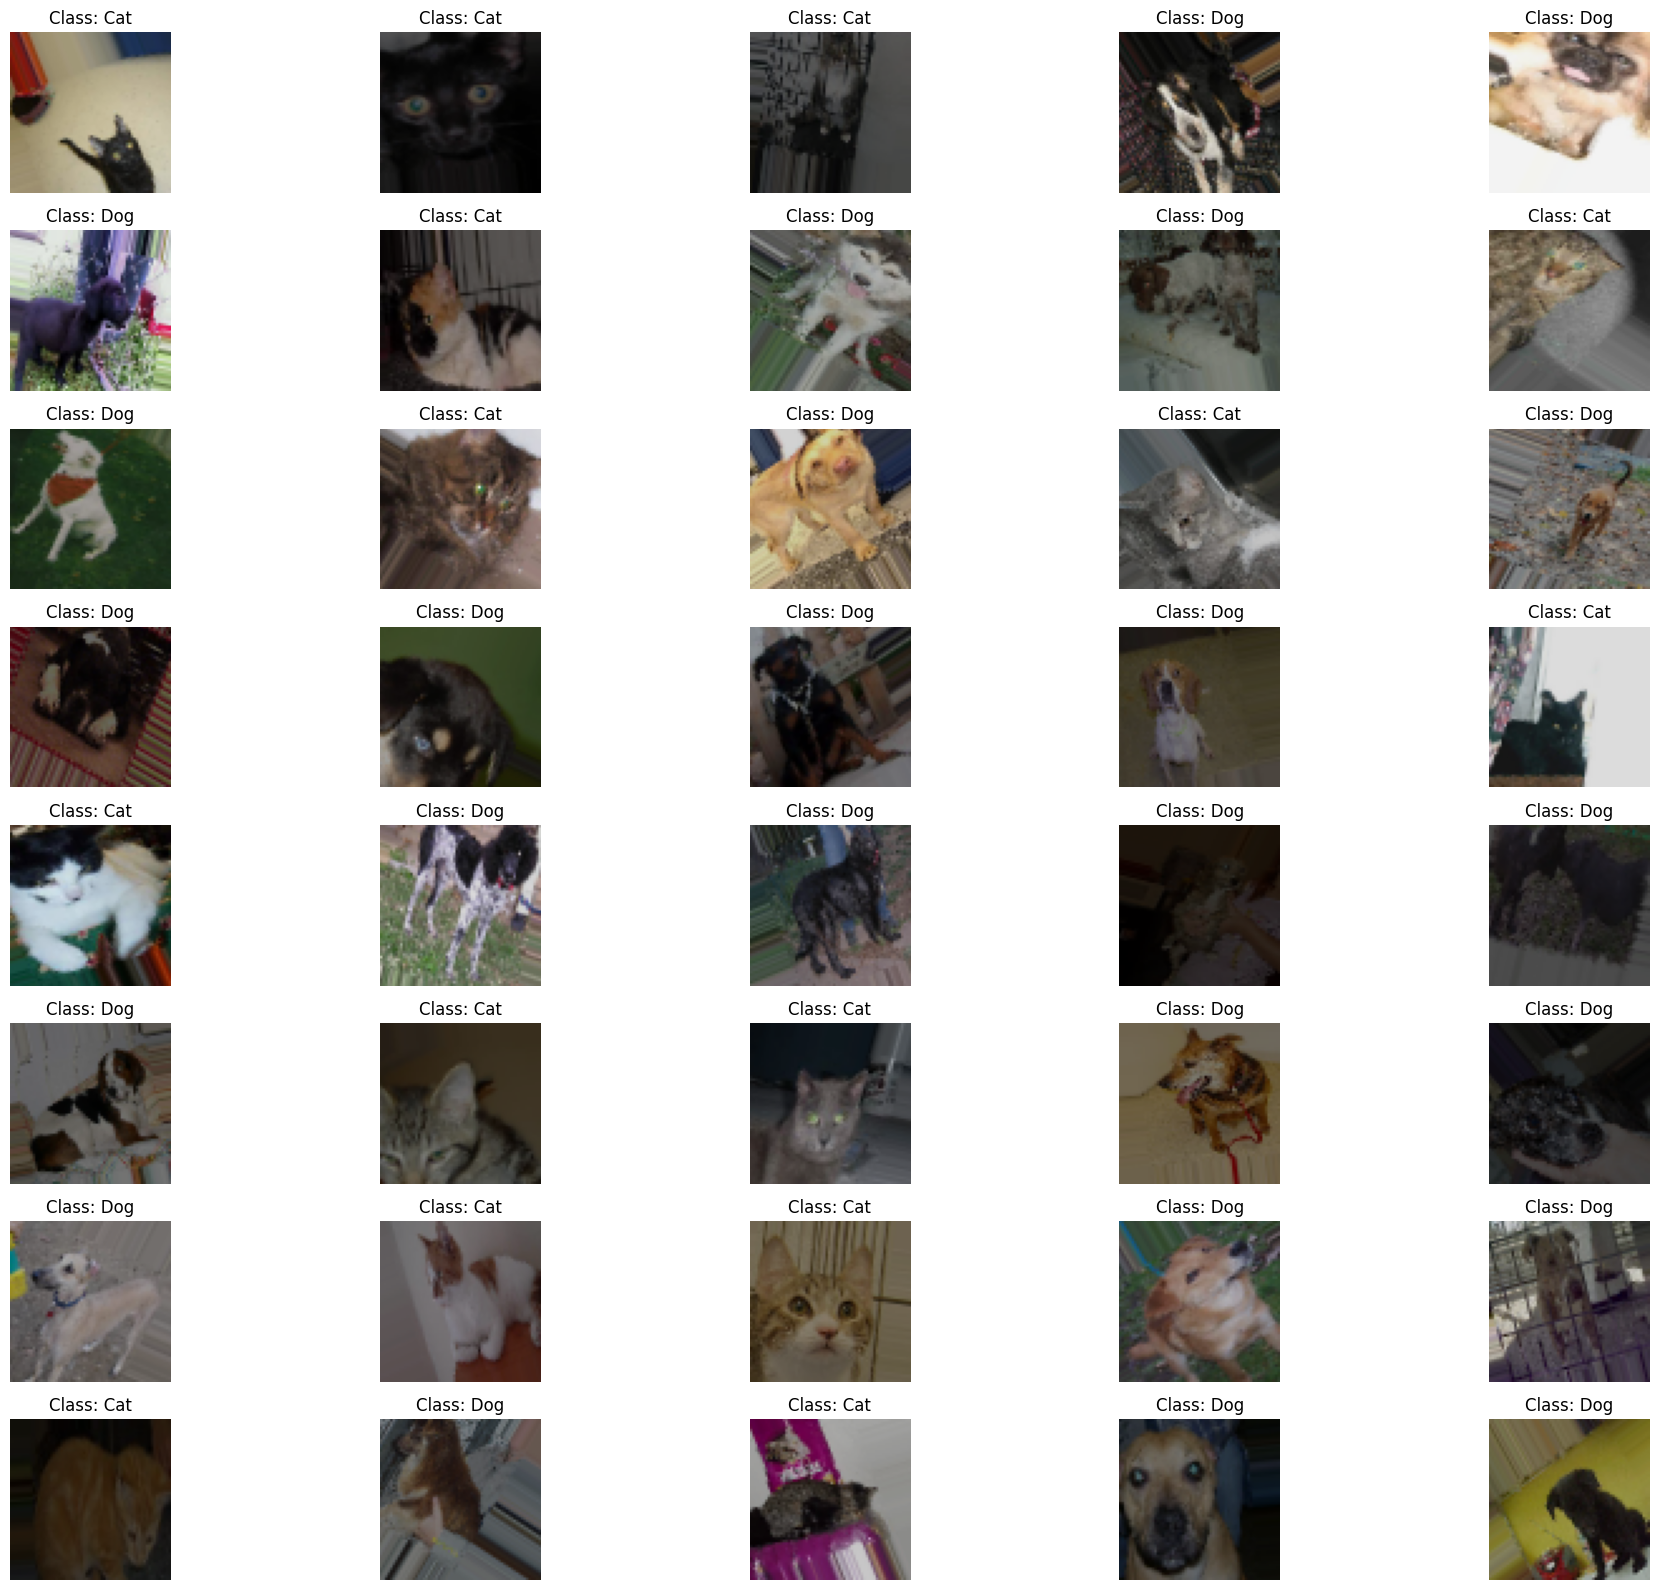

In [26]:
import numpy as np
import matplotlib.pyplot as plt

batch = next(trainGen)
images, labels = batch[0], batch[1]

random_indices = np.random.choice(len(images), 40, replace=False)
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 16))
axes = axes.flatten()

for ax, idx in zip(axes, random_indices):
    img = images[idx]
    label = labels[idx]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Class: {'Cat' if label ==0 else 'Dog'}")

plt.tight_layout()
plt.show()

훈련

In [27]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt 
import numpy as np 
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np. random.seed (seed)
tf. random.set_seed (seed)

In [32]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers, Input
model = Sequential()
model. add (Input(shape=(64, 64, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add (layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add (layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add (layers.MaxPooling2D((2, 2)))
model.add (layers.Flatten())
model.add(layers.Dropout(0.5))
model.add (layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model. summary ()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,001 (1.92 MB)

 Trainable params: 504,001 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [34]:
MODEL_DIR = 'model/' 
if not os.path.exists(MODEL_DIR):
    os.mkdir (MODEL_DIR)
modelpath="model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [35]:
epochs = 128
history = model.fit(
    trainGen,
    epochs=epochs,
    steps_per_epoch=trainGen.samples // trainGen.batch_size, 
    validation_steps=validationGen.samples // validationGen.batch_size, 
    validation_data=validationGen, 
    callbacks=[checkpointer, early_stopping_callback]
)

Epoch 1/128
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.5159 - loss: 0.6910
Epoch 1: val_loss improved from inf to 0.68232, saving model to model/01-0.6823.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 67s 817ms/step - accuracy: 0.5163 - loss: 0.6909 - val_accuracy: 0.5582 - val_loss: 0.6823
Epoch 2/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.5664 - loss: 0.6786
Epoch 2: val_loss did not improve from 0.68232
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5664 - loss: 0.6786 - val_accuracy: 0.4926 - val_loss: 0.7118
Epoch 3/128


2024-07-29 15:47:13.967330: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5769 - loss: 0.6747
Epoch 3: val_loss improved from 0.68232 to 0.65701, saving model to model/03-0.6570.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5770 - loss: 0.6747 - val_accuracy: 0.6153 - val_loss: 0.6570
Epoch 4/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 38s 502ms/step - accuracy: 0.6250 - loss: 0.6343
Epoch 4: val_loss improved from 0.65701 to 0.65017, saving model to model/04-0.6502.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 0.6343 - val_accuracy: 0.6176 - val_loss: 0.6502
Epoch 5/128
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.6090 - loss: 0.6545
Epoch 5: val_loss improved from 0.65017 to 0.63457, saving model to model/05-0.6346.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6091 - loss: 0.6544 - val_accuracy: 0.6398 - val_loss: 0.6346
Epoch 6/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 34s 445ms/step - accuracy: 0.6484 - loss: 0.6297
Epoch 6: val_loss did not improve from 0.63457
78

2024-07-29 15:50:31.670846: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6392 - loss: 0.6330
Epoch 7: val_loss improved from 0.63457 to 0.60441, saving model to model/07-0.6044.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6391 - loss: 0.6329 - val_accuracy: 0.6729 - val_loss: 0.6044
Epoch 8/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 45s 597ms/step - accuracy: 0.6758 - loss: 0.6104
Epoch 8: val_loss did not improve from 0.60441
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6758 - loss: 0.6104 - val_accuracy: 0.6324 - val_loss: 0.6106
Epoch 9/128
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6632 - loss: 0.6098
Epoch 9: val_loss improved from 0.60441 to 0.57326, saving model to model/09-0.5733.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.6634 - loss: 0.6096 - val_accuracy: 0.7044 - val_loss: 0.5733
Epoch 10/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 40s 532ms/step - accuracy: 0.6797 - loss: 0.5919
Epoch 10: val_loss did not improve from 0.57326
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accur

2024-07-29 15:56:57.643808: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.7222 - loss: 0.5485
Epoch 15: val_loss did not improve from 0.51235
78/78 ━━━━━━━━━━━━━━━━━━━━ 75s 900ms/step - accuracy: 0.7222 - loss: 0.5484 - val_accuracy: 0.7461 - val_loss: 0.5222
Epoch 16/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 30s 393ms/step - accuracy: 0.8203 - loss: 0.4656
Epoch 16: val_loss improved from 0.51235 to 0.48209, saving model to model/16-0.4821.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8203 - loss: 0.4656 - val_accuracy: 0.7721 - val_loss: 0.4821
Epoch 17/128
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.7217 - loss: 0.5432
Epoch 17: val_loss did not improve from 0.48209
78/78 ━━━━━━━━━━━━━━━━━━━━ 66s 810ms/step - accuracy: 0.7217 - loss: 0.5431 - val_accuracy: 0.7420 - val_loss: 0.5233
Epoch 18/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - accuracy: 0.6914 - loss: 0.5689
Epoch 18: val_loss did not improve from 0.48209
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6914 - loss: 0.5689 

2024-07-29 16:06:18.533725: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7732 - loss: 0.4663
Epoch 31: val_loss improved from 0.44871 to 0.42096, saving model to model/31-0.4210.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.7733 - loss: 0.4662 - val_accuracy: 0.8035 - val_loss: 0.4210
Epoch 32/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 2:27 2s/step - accuracy: 0.7891 - loss: 0.4233
Epoch 32: val_loss did not improve from 0.42096
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7891 - loss: 0.4233 - val_accuracy: 0.7426 - val_loss: 0.4781
Epoch 33/128
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7884 - loss: 0.4546
Epoch 33: val_loss did not improve from 0.42096
78/78 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7884 - loss: 0.4546 - val_accuracy: 0.7854 - val_loss: 0.4542
Epoch 34/128
 1/78 ━━━━━━━━━━━━━━━━━━━━ 59s 774ms/step - accuracy: 0.7617 - loss: 0.4939
Epoch 34: val_loss improved from 0.42096 to 0.37962, saving model to model/34-0.3796.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - a

In [36]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

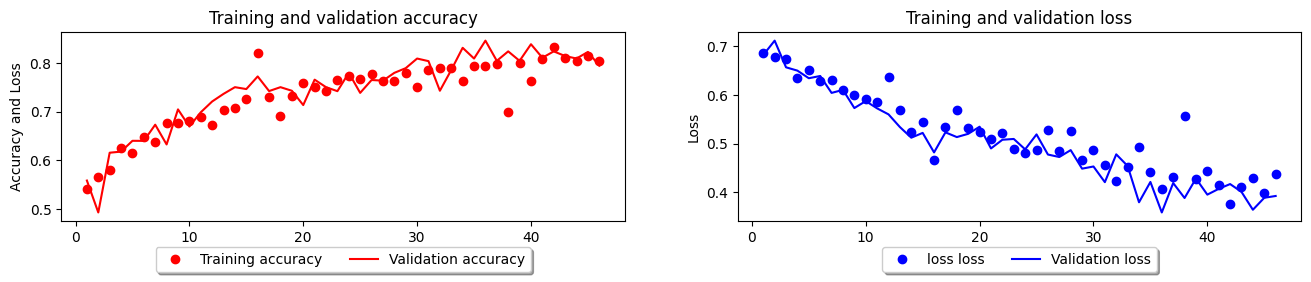

In [39]:
plt.figure(figsize=(16, 1))

plt.subplot(121)
plt.subplots_adjust(top=2)
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=5)

plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='loss loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=5)
plt.show()